In [17]:
!pip install 'stable-baselines[extra]' 

In [ ]:
!pip install PyAutoGUI

In [ ]:
!pip install mss pydirectinput pytesseract

In [ ]:
!pip install opencv-python

In [2]:
from mss import mss
#import pydirectinput
import pyautogui
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import time
#from gym import Env
from gymnasium import Env
from gymnasium.spaces import Box, Discrete
from DinoEnv import DinoGame

In [2]:
# class DinoGame(Env):
#     def __init__(self):
#         super().__init__()
#         self.observation_space = Box(low=0, high=255, shape = (1,83,100), dtype = np.uint8)
#         self.action_space = Discrete(3)
#         self.cap = mss()
#         self.game_location = {'top':300, 'left':0, 'width':400, 'height':250}
#         self.done_location = {'top':330, 'left':240, 'width':240, 'height':35}
        
                
        
#     def step(self, action):
#         # Actions 0 = Space, 1 = Down, 2 = No action
#         action_map = {0: 'space',
#                      1 : 'down',
#                      2 : 'no_op'}

#         if action != 2:
#             pyautogui.keyDown(action_map[action])
#             time.sleep(0.1)
#             pyautogui.keyUp(action_map[action])
            
#         # Check if the game is done
#         done, done_cap = self.get_done()
        
#         # Get new obs
#         new_obs = self.get_observation()
        
#         # Reward
#         reward = -100 if done else (3 if action == 2 else 1)
        
#         # info dict - that's what stablebaselines3 expects that's why it's defined
#         info = {}
        
#         return new_obs, reward, done, False, info
        
#     def render(self):
#         obs = np.array(self.cap.grab(self.game_location))[:,:,:3]
#         #plt.imshow(obs)
#         cv2.imshow('Game', obs)
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             self.close()
        
#     def reset(self, seed=None, options=None):
#         super().reset(seed=seed)
#         time.sleep(1)
#         pyautogui.click(x = 150, y = 150)
#         pyautogui.keyDown('space')
#         time.sleep(0.1)
#         pyautogui.keyUp('space')
#         info = {}
#         return self.get_observation(), info
        
        
#     def get_observation(self):
#         # Take the screen capture
#         # It returns 4 channels so slicing just first 3 channels
#         raw_obs = np.array(self.cap.grab(self.game_location))[:,:,:3]
#         # Grayscale observation
#         gray_obs = cv2.cvtColor(raw_obs, cv2.COLOR_BGR2GRAY)
#         # Resize the image
#         resized_obs = cv2.resize(gray_obs,(100,83))
#         adjusted_image = cv2.convertScaleAbs(resized_obs, alpha=1.5, beta=0)
#         # See the channels first - because stablebaselines3 requires it!
#         channel = np.reshape(adjusted_image,(1,83,100))
        
#         return channel
        
#     def get_done(self):
#         # Get 'Game Over' text on the screen
#         done_cap = np.array(self.cap.grab(self.done_location))[:,:,:3]
#         # Valid done text
#         done_strings = ['GAME', 'GAHE']

#         # Set done initially to false
#         done = False
#         # Convert image to string using pytesseract
#         res = pytesseract.image_to_string(done_cap)[:4]
#         # Check if the string we converted in the done_strings
#         if res in done_strings:
#             # Return true if it captures 'GAME OVER'
#             done = True
        
#         return done, done_cap
        
#     def close(self):
#         # close all windows which opened while rendering
#         cv2.destroyAllWindows()


In [7]:
env = DinoGame()

In [8]:
obs = env.get_observation()

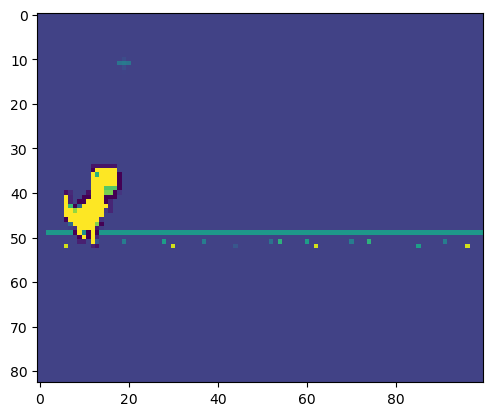

In [9]:
plt.imshow(obs[0]);

In [10]:
done, done_cap = env.get_done()
print(done)

False


In [7]:
for episode in range(10):
    obs, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        obs, reward, done, _, info = env.step(env.action_space.sample())
        total_reward += reward
    print(f'Total reward for episode {episode + 1 } is {total_reward}')

Total reward for episode 1 is -80
Total reward for episode 2 is -85
Total reward for episode 3 is -85
Total reward for episode 4 is -74
Total reward for episode 5 is -75
Total reward for episode 6 is -60
Total reward for episode 7 is -63
Total reward for episode 8 is -66
Total reward for episode 9 is -74
Total reward for episode 10 is -77


In [11]:
import os
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common import env_checker

In [9]:
# Checking environment
env_checker.check_env(env)

In [10]:
# Save the model Callbacks to the directories that we will define
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [11]:
checkpoint_dir = './train/'
log_dir = './logs/'

In [12]:
callback = TrainAndLoggingCallback(check_freq = 1000, save_path = checkpoint_dir)

In [12]:
from stable_baselines3 import DQN

In [16]:
# define DQN model
model = DQN('CnnPolicy', env, tensorboard_log = log_dir, verbose = 1,
            buffer_size=150000, learning_starts = 1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [18]:
model.learn(total_timesteps=150000, callback=callback)

Logging to ./logs/DQN_11
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | -75      |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2        |
|    time_elapsed     | 33       |
|    total_timesteps  | 70       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | -73.9    |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2        |
|    time_elapsed     | 60       |
|    total_timesteps  | 137      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | -75.4    |
|    exploration_rate | 0.988    |
| time/               |       

In [19]:
best_model = DQN.load(os.path.join('train', 'best_model_150000'))

In [22]:
for episode in range(10):
    obs, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ =  best_model.predict(obs)
        obs, reward, done, _, info = env.step(int(action))
        total_reward += reward
    print(f'Total reward for episode {episode + 1 } is {total_reward}')

Total reward for episode 1 is 323
Total reward for episode 2 is 238


KeyboardInterrupt: 